# Задание

In [1]:
import numpy as np
from sgd import SGDRegressor as CSGD
from exact import ExactRegressor as ExReg
from matplotlib import pyplot as plt
from typing import List

%matplotlib inline
%load_ext autoreload
%autoreload 2

Для начала давайте вообще прочитаем наши данные, для этого воспользуемся утилитой, написанной для задачи подсчёта SMAPE:

In [2]:
from smape import read_data

with open('data/1.txt', 'r') as f:
    X, y = read_data(reader = f.readline)
    
X[:10], y[:10]

(array([[  861813.,  -109689.,  -501867., ...,  6259280., -1042685.,
          -138552.],
        [  734897.,  -109701.,  -501867., ...,  6219628., -1042685.,
          -138631.],
        [  893009.,  -109653.,  -501867., ...,  6223772., -1042685.,
          -139484.],
        ...,
        [  282421.,  -109711.,  -501867., ...,  6073439., -1042685.,
          -141486.],
        [  400098.,  -109677.,  -501867., ...,  6059709., -1042685.,
          -141303.],
        [  367054.,  -109625.,  -501867., ...,  5917236., -1042685.,
          -140439.]]),
 array([-6219662., -4472740., -4250292., -4055391., -3929017., -1333421.,
        -1178008.,   881451.,  1008284.,  1252360.]))

## 1

Постройте график зависимости ошибки SMAPE и MSE на тестовом множестве от параметра регуляризации для метода наименьших квадратов.

In [3]:
from sgd import mse_loss, smape_loss

mse: List[float] = []
smape: List[float] = []

grid = np.arange(0, 5, 0.1)

for tau in grid:
    y_pred = ExReg(ridge_coef = tau).fit(X, y).predict(y)
    
    mse.append(mse_loss(y_pred, y))
    smape.append(smape_loss(y_pred, y))

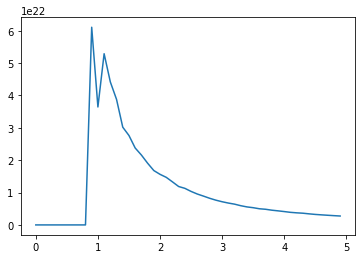

In [4]:
plt.plot(grid, mse)
plt.show()

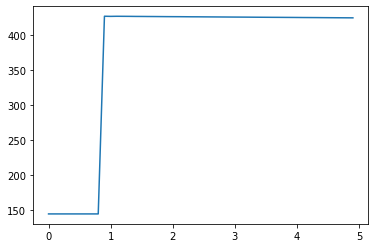

In [5]:
plt.plot(grid, smape)
plt.show()

Ну вот чёт нарисовалось.

## 2

Постройте график зависимости экспоненциального скользящего среднего эмпирического риска на тренировочном множестве для градиентных спусков.

In [6]:
from sklearn.preprocessing import StandardScaler as Scaler

Xn, yn = Scaler().fit_transform(X), Scaler().fit_transform(y.reshape(-1, 1)).flatten()

In [7]:
def sliding_loss(losses: List[float], lambd: float) -> List[float]:
    sliding = 0.
    
    result: List[float] = []
    
    for loss in losses:
        sliding = (1 - lambd) * sliding + lambd * loss
        result.append(sliding)
        
    return result

In [8]:
models = {
    'MSE + LR e-4': CSGD(loss='MSE', reg=None, learning_rate=1e-4),
    'MSE + 0.5 RIDGE + LR e-4' : CSGD(loss='MSE', reg='Ridge', ridge_tau = .5, learning_rate=1e-4),
    'MSE + 0.5 LASSO + LR e-4' : CSGD(loss='MSE', reg='Lasso', lasso_tau = .5, learning_rate=1e-4),
    'MSE + LR e-4 + fading e-3': CSGD(loss='MSE', reg=None, learning_rate=1e-4, fading=0.999),
    'MSE + 0.5 RIDGE + LR e-4 + fading e-3' : CSGD(loss='MSE', reg='Ridge', ridge_tau = .5, learning_rate=1e-4, fading=0.999),
    'MSE + 0.5 LASSO + LR e-4 + fading e-3' : CSGD(loss='MSE', reg='Lasso', lasso_tau = .5, learning_rate=1e-4, fading=0.999),
}

lambd = .95

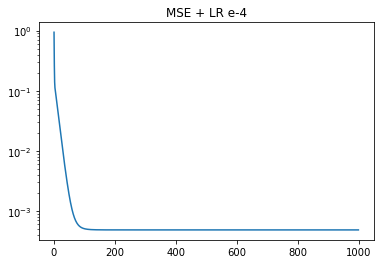

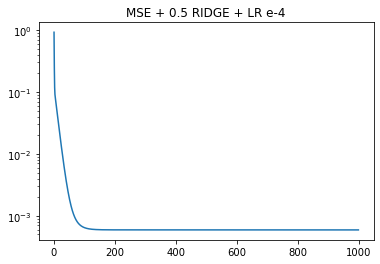

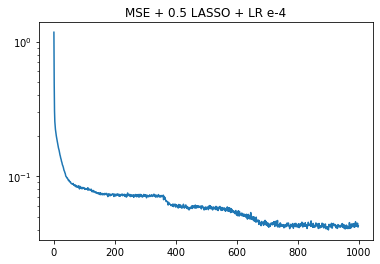

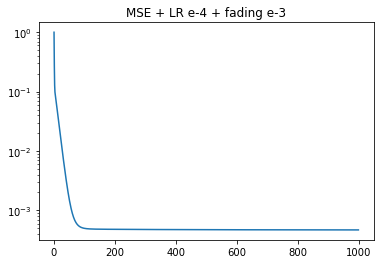

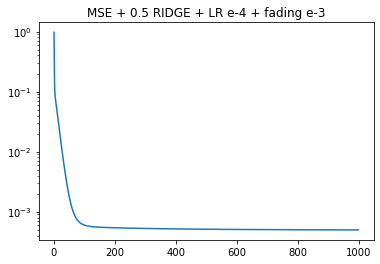

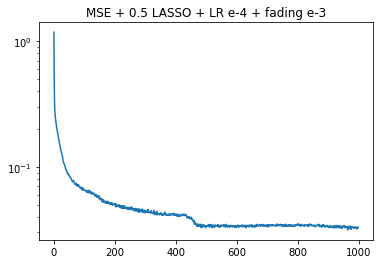

In [9]:
for name, model in models.items():
    model.fit(Xn, yn).predict(Xn)
    
    slide = sliding_loss(model.epoch_loss_, lambd)
    
    plt.plot(slide)
    plt.yscale('log')
    plt.title(name)
    plt.show()

## 3

Оцените каждый из трёх методов на тестовом множестве данных при помощи NRMSE и SMAPE.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.33, random_state=42)

In [11]:
models = {
    'exact': ExReg(),
    'MSE': CSGD(loss='MSE', learning_rate=1e-4, fading=0.999),
    'SMAPE': CSGD(loss='SMAPE', max_iter=100, learning_rate=1e-2),
}

In [12]:
for name, model in models.items():
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    mse = mse_loss(y_test, y_pred)
    smape = smape_loss(y_test, y_pred)
    
    print(f'{name.ljust(6)}:\n MSE   = {mse}\n SMAPE = {smape}')

exact :
 MSE   = 0.000978694433494191
 SMAPE = 0.7465529600533404
MSE   :
 MSE   = 0.00015499593682611013
 SMAPE = 0.2280115908164007
SMAPE :
 MSE   = 311111.06537661026
 SMAPE = 133.74324007961582
